<a href="https://colab.research.google.com/github/Pawan300/digit-recognition/blob/master/Mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/test.csv")
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/train.csv")

In [54]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X=train.iloc[:,1:]
x_train,x_test,x_train_label,x_test_label=train_test_split(X,train['label'],train_size=0.8)

In [0]:
def plot(i,data,j):
  plt.imshow(np.array(data.iloc[i]).reshape(28,28), cmap=cm.gray)
  plt.figure(j)

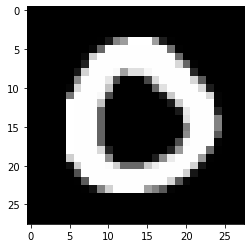

In [58]:
plot(4,X,1)

### Using library function of PCA

In [0]:
def Pca_model(n_comp,data):
  model=PCA(n_components=n_comp).fit(data)
  return(model)

In [0]:
def accuracy(l):
  for i in range(len(l)):
    model=Pca_model(l[i],X)
    v=model.components_
    res=(X.dot(v.T)).dot(v)
    print("for",l[i],"PCA components")
    plot(4,res,i)

for 100 PCA components
for 300 PCA components
for 400 PCA components
for 500 PCA components
for 600 PCA components
for 700 PCA components


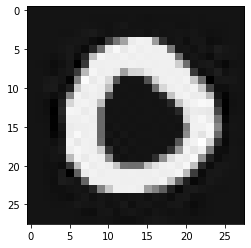

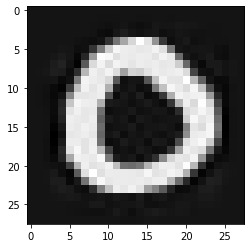

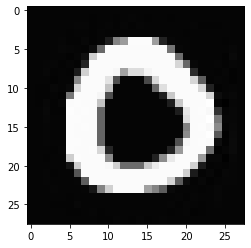

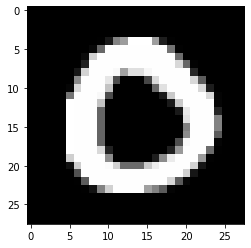

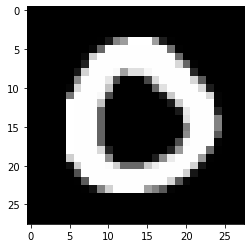

<Figure size 432x288 with 0 Axes>

In [12]:
accuracy([100,300,400,500,600,700])

### PCA implementation

In [0]:
def pca_model2(data,component):
    cov_mat=np.cov(data,rowvar=False)
    eigen=np.linalg.eigh(cov_mat)
    pca=np.matrix(eigen[1][-component:])
    x_bar=(pca.T.dot(pca.dot(data.T))).T
    return(x_bar)

In [0]:
def plot2(l):
  for i in range(len(l)):
    res=pca_model2(X,l[i])
    plot(4,pd.DataFrame(res),i)

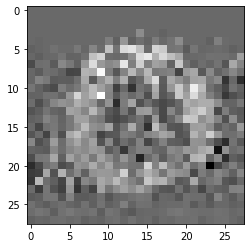

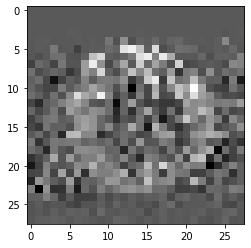

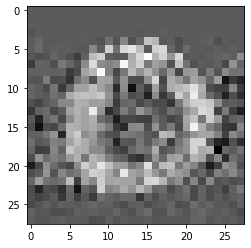

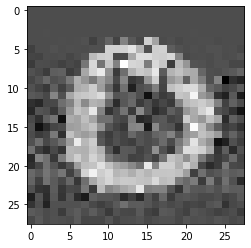

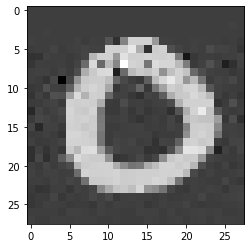

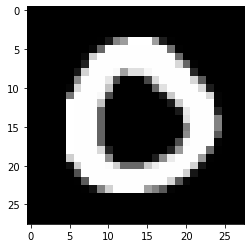

<Figure size 432x288 with 0 Axes>

In [15]:
plot2([100,300,400,500,600,700,784])

### KNN without PCA

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5,n_jobs=1)
knn_model.fit(x_train,x_train_label)
predicted=knn_model.predict(x_test)
f1_score(predicted,x_test_label,labels=[0,1,2,3,4,5,6,7,8,9],average='micro')

0.9661904761904762

### KNN with PCA

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=5,n_jobs=1)
pca_model=PCA(n_components=500)

pipe=Pipeline([('pca',pca_model),('knn',knn_model)])

pipe.fit(x_train,x_train_label)
predicted=pipe.predict(x_test)
f1_score(predicted,x_test_label,labels=[0,1,2,3,4,5,6,7,8,9],average='micro')

0.9663095238095238

### SVM

In [59]:
from sklearn.svm import SVC

svm_model=SVC(gamma='auto')
svm_model.fit(x_train,x_train_label)
predicted=svm_model.predict(x_test)
f1_score(predicted,x_test_label,labels=[0,1,2,3,4,5,6,7,8,9],average='micro')

0.10809523809523809

### Neural Network

In [19]:
from sklearn.neural_network import MLPClassifier

mlp_model=MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
mlp_model.fit(x_train,x_train_label)
predicted=mlp_model.predict(x_test)
f1_score(predicted,x_test_label,labels=[0,1,2,3,4,5,6,7,8,9],average='micro')

0.9591666666666666

### CNN

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
x_train=x_train.values.reshape(33600,28,28,1)
x_test=x_test.values.reshape(8400,28,28,1)

In [0]:
x_train_label=keras.utils.to_categorical(x_train_label,10)
x_test_label=keras.utils.to_categorical(x_test_label,10)

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [47]:
model.fit(x_train,x_train_label,batch_size=128,epochs=12,validation_data=(x_test,x_test_label))
score=model.evaluate(x_test,x_test_label,verbose=0)
print(score)

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 94s 3ms/step - loss: 3.1475 - acc: 0.7408 - val_loss: 0.1016 - val_acc: 0.9706
Epoch 2/12
33600/33600 [==============================] - 93s 3ms/step - loss: 0.1545 - acc: 0.9549 - val_loss: 0.0885 - val_acc: 0.9743
Epoch 3/12
33600/33600 [==============================] - 93s 3ms/step - loss: 0.1021 - acc: 0.9699 - val_loss: 0.0565 - val_acc: 0.9825
Epoch 4/12
33600/33600 [==============================] - 94s 3ms/step - loss: 0.0815 - acc: 0.9757 - val_loss: 0.0616 - val_acc: 0.9824
Epoch 5/12
33600/33600 [==============================] - 94s 3ms/step - loss: 0.0663 - acc: 0.9799 - val_loss: 0.0568 - val_acc: 0.9842
Epoch 6/12
33600/33600 [==============================] - 96s 3ms/step - loss: 0.0587 - acc: 0.9828 - val_loss: 0.0515 - val_acc: 0.9871
Epoch 7/12
33600/33600 [==============================] - 94s 3ms/step - loss: 0.0493 - acc: 0.9841 - val_loss: 0.0547 - val_acc:

Saving model

In [0]:
from keras.models import model_from_json
model_json=model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/model.json","w") as json_file:
  json_file.write(model_json)

In [49]:
model.save_weights("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/weights.h5")
print("Model Saved")

Model Saved


Loading model

In [50]:
json_file=open("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/model.json",'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/weights.h5")
print("Loaded model from disk")

Loaded model from disk
